In [1]:
import pandas

In [2]:
df = pandas.read_csv('electoral.csv')
df

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
0,1054,839,837,-2,4,833,NaN,NaN,NaN,NaN,NaN,NaN,68,395,123,244,57,409,91,247
1,1009,756,755,-1,9,746,NaN,NaN,NaN,NaN,NaN,NaN,44,349,98,252,41,351,76,259
2,1064,689,687,-2,4,683,865.0,808.0,NaN,NaN,NaN,NaN,58,354,77,187,51,350,62,190
3,990,720,719,-1,9,710,NaN,NaN,NaN,NaN,NaN,NaN,43,364,89,206,36,372,66,211
4,964,727,727,0,11,716,NaN,NaN,NaN,NaN,NaN,NaN,49,327,108,230,46,331,92,234
5,1073,813,813,0,7,806,NaN,NaN,NaN,NaN,NaN,NaN,43,389,134,237,48,386,118,238
6,943,671,669,-2,3,666,NaN,NaN,NaN,NaN,NaN,NaN,43,338,77,202,38,340,60,200
7,926,700,700,0,6,694,NaN,NaN,NaN,NaN,NaN,NaN,42,291,106,249,44,293,92,249
8,1097,811,811,0,4,807,NaN,NaN,NaN,NaN,NaN,NaN,68,403,101,230,67,404,84,234
9,1002,768,764,-4,6,758,NaN,NaN,NaN,NaN,NaN,NaN,67,329,86,273,61,339,58,288


## Making sanity checks
e.g. total number of voters (AE) > number of voters on voting day (FE)

In [23]:
df['AE>FE?'] = ((df['AE'] - df['FE']) > 0)
df.loc[df['AE>FE?'] == False]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?
9572,12,12,12,0,1,11,2.0,2.0,NaN,NaN,...,NaN,2,6,0,3,2,6,0,3,False


Yes of course, it is technically possible that all voters showed up! (if the district is small enough, which it is)

No. of ballots (KE) = no. of voters on the day (FE) + missing ballots (LE) :

In [24]:
df['FE+LE=KE?'] = ((df['FE'] + df['LE']) == df['KE'])
df.loc[df['FE+LE=KE?'] == False]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?
29,714,588,2387,-12,30,2357,857.0,NaN,1132.0,2703.0,...,152,1057,234,891,154,1004,307,852,True,False
139,624,429,1643,-3,20,1623,875.0,NaN,480.0,1979.0,...,213,582,169,596,210,588,171,581,True,False
252,931,646,1737,-1,12,1725,841.0,NaN,381.0,2153.0,...,225,697,142,601,228,685,157,591,True,False
296,1102,773,3161,-13,28,3133,1497.0,NaN,1116.0,3715.0,...,264,1412,491,948,274,1390,423,979,True,False
350,587,414,2688,-22,27,2661,1575.0,NaN,948.0,3110.0,...,270,1062,408,893,273,1054,393,878,True,False
438,654,294,1889,-25,19,1870,1278.0,NaN,566.0,2498.0,...,292,707,198,615,288,707,218,604,True,False
511,762,538,1755,-9,7,1748,1001.0,NaN,372.0,2135.0,...,281,689,143,580,294,657,158,576,True,False
602,668,470,2376,36,206,2170,1190.0,NaN,892.0,2750.0,...,158,1050,254,708,155,996,299,667,True,False
692,593,443,2465,-78,23,2442,1131.0,NaN,1181.0,2905.0,...,179,1121,291,795,170,1197,328,762,True,False
799,897,513,2530,-10,15,2515,1332.0,NaN,916.0,3145.0,...,256,849,263,1075,288,844,320,959,True,False


These must be special districts, where extra ballots are counted from e.g. people voting abroad;

Let's check: in these cases the total no. of voters is JE, thus JE must be filled in these rows (and nowhere else)

In [32]:
df.loc[(df['FE+LE=KE?'] == False) & df['JE'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?


In [34]:
df.loc[(df['FE+LE=KE?'] == True) & (~df['JE'].isnull())]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?


So far so good!

Now, checking: invalied ballots (ME) + valid ballots (NE) = total no. of ballots (KE)

In [35]:
df['ME+NE=KE?'] = ((df['ME'] + df['NE']) == df['KE'])
df.loc[df['ME+NE=KE?'] == False]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?


Great!

Now, for more complicated districts: where votes from abroad are counted,

e.g. JE and C (voters registered abroad) should be filled at the same time

In [40]:
df.loc[df['JE'].isnull() & (~df['C'].isnull())]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?


In [41]:
df.loc[(~df['JE'].isnull()) & df['C'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?


Which they are, great.

In these cases, the additional sanity checks are:

AE + BE + C = EE (total number of voters, including those registered elsewhere)

FE + IE = JE (total number of voters showed/who mailed their ballot)

IE < BE + C (ballots from abroad < voters registered abroad)

JE < EE (total no. of ballots < total no. of registered voters)

JE + LE = KE (total registered + extra/missing ballots = total no. of ballots)

In [43]:
df['AE+BE+C=EE?'] = ((df['AE'] + df['BE'] + df['C']) == df['EE'])
df.loc[(df['AE+BE+C=EE?'] == False) & ~df['EE'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?,AE+BE+C=EE?


In [45]:
df['FE+IE=JE?'] = ((df['FE'] + df['IE'] == df['JE']))
df.loc[(df['FE+IE=JE?'] == False) & ~df['JE'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,mszp1,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?,AE+BE+C=EE?,FE+IE=JE?


In [49]:
df['IE<BE+C?'] = ((df['BE'] + df['C'] > df['IE']))
df.loc[(df['IE<BE+C?'] == False) & ~df['IE'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,jobbik2,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?,AE+BE+C=EE?,FE+IE=JE?,IE<BE+C?


In [50]:
df['JE<EE?'] = ((df['JE'] < df['EE']))
df.loc[(df['JE<EE?'] == False) & ~df['JE'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,fidesz2,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?,AE+BE+C=EE?,FE+IE=JE?,IE<BE+C?,JE<EE?


In [52]:
df['JE+LE=KE?'] = ((df['JE'] + df['LE'] == df['KE']))
df.loc[(df['JE+LE=KE?'] == False) & ~df['JE'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,lmp2,mszp2,AE>FE?,FE+LE=KE?,ME+NE=KE?,AE+BE+C=EE?,FE+IE=JE?,IE<BE+C?,JE<EE?,JE+LE=KE?


Great! There's a third type of district with some BE data (additional voters and ballots, registered elsewhere but no ballots from abroad). Since the data so far checks out, I'll leave those sanity checks out, but I can come back later.

## Resetting dataframe

We could also make sanity checks with the specific parties, but I'll skip that for now

In [55]:
df = df[df.columns[0:20]]
df

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
0,1054,839,837,-2,4,833,NaN,NaN,NaN,NaN,NaN,NaN,68,395,123,244,57,409,91,247
1,1009,756,755,-1,9,746,NaN,NaN,NaN,NaN,NaN,NaN,44,349,98,252,41,351,76,259
2,1064,689,687,-2,4,683,865.0,808.0,NaN,NaN,NaN,NaN,58,354,77,187,51,350,62,190
3,990,720,719,-1,9,710,NaN,NaN,NaN,NaN,NaN,NaN,43,364,89,206,36,372,66,211
4,964,727,727,0,11,716,NaN,NaN,NaN,NaN,NaN,NaN,49,327,108,230,46,331,92,234
5,1073,813,813,0,7,806,NaN,NaN,NaN,NaN,NaN,NaN,43,389,134,237,48,386,118,238
6,943,671,669,-2,3,666,NaN,NaN,NaN,NaN,NaN,NaN,43,338,77,202,38,340,60,200
7,926,700,700,0,6,694,NaN,NaN,NaN,NaN,NaN,NaN,42,291,106,249,44,293,92,249
8,1097,811,811,0,4,807,NaN,NaN,NaN,NaN,NaN,NaN,68,403,101,230,67,404,84,234
9,1002,768,764,-4,6,758,NaN,NaN,NaN,NaN,NaN,NaN,67,329,86,273,61,339,58,288


## Analysis: extra ballots

In [45]:
dfExtraBallots = df.loc[df['LE'] > 0].copy()
dfExtraBallots

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
96,922,634,635,1,10,625,NaN,NaN,NaN,NaN,NaN,NaN,74,267,71,206,74,249,81,196
97,863,561,562,1,7,555,NaN,NaN,NaN,NaN,NaN,NaN,61,223,65,198,62,204,66,195
106,907,696,697,1,13,684,NaN,NaN,NaN,NaN,NaN,NaN,40,285,73,281,45,267,80,269
109,819,673,676,3,15,661,NaN,NaN,NaN,NaN,NaN,NaN,52,298,50,260,50,286,65,247
122,853,635,636,1,8,628,NaN,NaN,NaN,NaN,NaN,NaN,74,263,42,245,73,246,49,240
151,825,646,647,1,15,632,NaN,NaN,NaN,NaN,NaN,NaN,61,221,91,236,63,226,91,233
157,1031,773,777,4,44,733,NaN,NaN,NaN,NaN,NaN,NaN,87,255,65,318,78,257,81,318
250,920,599,600,1,14,586,NaN,NaN,NaN,NaN,NaN,NaN,75,235,34,223,77,229,41,216
316,703,454,455,1,7,448,NaN,NaN,NaN,NaN,NaN,NaN,49,178,42,175,46,174,45,172
342,997,574,575,1,11,564,NaN,NaN,NaN,NaN,NaN,NaN,73,190,75,221,76,182,72,222


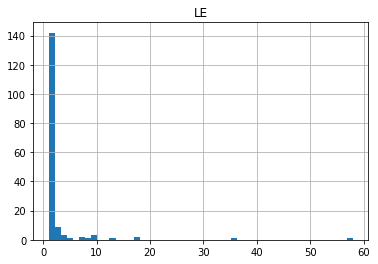

In [188]:
import matplotlib.pyplot as plt
dfExtraBallots.hist('LE',bins=50)
plt.show()

Those 30-something and >50 extra votes don't look good. Let's see the total no. of voters in those districts.

In [29]:
dfExtraBallots.loc[dfExtraBallots['LE'] > 30]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
602,668,470,2376,36,206,2170,1190.0,NaN,892.0,2750.0,1870.0,2340.0,158,1050,254,708,155,996,299,667
4146,840,402,460,58,231,229,519.0,455.0,NaN,NaN,NaN,NaN,31,115,0,83,27,113,0,84


District 602 looks OK: 36 / 2340 = 1.5%, and (winner)-(runner up) votes = 300 >> 36

District 4146 is not so good: 58 / 840 = 7%, and (winner)-(runner up) votes = 30 which is _half of the extra votes!_

Let's see whether there are any anomalies when looking at extra ballots as a percentage of total voters:

In [62]:
complexDistricts = dfExtraBallots.loc[~dfExtraBallots['JE'].isnull()].copy()
simpleDistricts = dfExtraBallots.loc[dfExtraBallots['JE'].isnull()].copy()

In [63]:
complexDistricts['LE/total'] = complexDistricts['LE'] / complexDistricts['JE']
complexDistricts

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,LE/total
602,668,470,2376,36,206,2170,1190.0,NaN,892.0,2750.0,...,2340.0,158,1050,254,708,155,996,299,667,0.015385
1848,621,378,1618,2,40,1578,1134.0,NaN,279.0,2034.0,...,1616.0,344,556,211,413,347,536,231,409,0.001238
3636,757,461,1993,3,70,1923,1624.0,NaN,108.0,2489.0,...,1990.0,541,855,104,400,543,814,125,417,0.001508
4119,988,578,1594,7,201,1393,914.0,NaN,224.0,2126.0,...,1587.0,333,591,131,324,360,662,127,360,0.004411
5277,1079,718,1626,3,65,1561,992.0,NaN,103.0,2174.0,...,1623.0,331,599,118,380,370,606,153,388,0.001848


In [64]:
simpleDistricts['LE/total'] = simpleDistricts['LE'] / simpleDistricts['FE']
simpleDistricts;

In [65]:
dfExtraBallots2 = pandas.concat([complexDistricts,simpleDistricts])

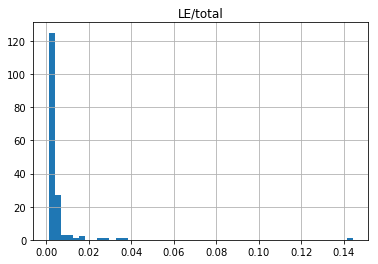

In [187]:
dfExtraBallots2.hist('LE/total',bins=50)
plt.show()

In [67]:
dfExtraBallots2.loc[dfExtraBallots2['LE/total']>0.05]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,LE/total
4146,840,402,460,58,231,229,519.0,455.0,NaN,NaN,...,NaN,31,115,0,83,27,113,0,84,0.144279


District 4146 is an outlier again.

It seems there are no other large number of extra ballots anywhere.

## Analysis: ratio of invalid votes

In [69]:
df
# we need to look at ME

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
0,1054,839,837,-2,4,833,NaN,NaN,NaN,NaN,NaN,NaN,68,395,123,244,57,409,91,247
1,1009,756,755,-1,9,746,NaN,NaN,NaN,NaN,NaN,NaN,44,349,98,252,41,351,76,259
2,1064,689,687,-2,4,683,865.0,808.0,NaN,NaN,NaN,NaN,58,354,77,187,51,350,62,190
3,990,720,719,-1,9,710,NaN,NaN,NaN,NaN,NaN,NaN,43,364,89,206,36,372,66,211
4,964,727,727,0,11,716,NaN,NaN,NaN,NaN,NaN,NaN,49,327,108,230,46,331,92,234
5,1073,813,813,0,7,806,NaN,NaN,NaN,NaN,NaN,NaN,43,389,134,237,48,386,118,238
6,943,671,669,-2,3,666,NaN,NaN,NaN,NaN,NaN,NaN,43,338,77,202,38,340,60,200
7,926,700,700,0,6,694,NaN,NaN,NaN,NaN,NaN,NaN,42,291,106,249,44,293,92,249
8,1097,811,811,0,4,807,NaN,NaN,NaN,NaN,NaN,NaN,68,403,101,230,67,404,84,234
9,1002,768,764,-4,6,758,NaN,NaN,NaN,NaN,NaN,NaN,67,329,86,273,61,339,58,288


In [70]:
complexDistricts = df.loc[~df['JE'].isnull()].copy()
simpleDistricts = df.loc[df['JE'].isnull()].copy()

In [71]:
complexDistricts['ME/total'] = complexDistricts['ME'] / complexDistricts['JE']
complexDistricts

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,ME/total
29,714,588,2387,-12,30,2357,857.0,NaN,1132.0,2703.0,...,2399.0,152,1057,234,891,154,1004,307,852,0.012505
139,624,429,1643,-3,20,1623,875.0,NaN,480.0,1979.0,...,1646.0,213,582,169,596,210,588,171,581,0.012151
252,931,646,1737,-1,12,1725,841.0,NaN,381.0,2153.0,...,1738.0,225,697,142,601,228,685,157,591,0.006904
296,1102,773,3161,-13,28,3133,1497.0,NaN,1116.0,3715.0,...,3174.0,264,1412,491,948,274,1390,423,979,0.008822
350,587,414,2688,-22,27,2661,1575.0,NaN,948.0,3110.0,...,2710.0,270,1062,408,893,273,1054,393,878,0.009963
438,654,294,1889,-25,19,1870,1278.0,NaN,566.0,2498.0,...,1914.0,292,707,198,615,288,707,218,604,0.009927
511,762,538,1755,-9,7,1748,1001.0,NaN,372.0,2135.0,...,1764.0,281,689,143,580,294,657,158,576,0.003968
602,668,470,2376,36,206,2170,1190.0,NaN,892.0,2750.0,...,2340.0,158,1050,254,708,155,996,299,667,0.088034
692,593,443,2465,-78,23,2442,1131.0,NaN,1181.0,2905.0,...,2543.0,179,1121,291,795,170,1197,328,762,0.009044
799,897,513,2530,-10,15,2515,1332.0,NaN,916.0,3145.0,...,2540.0,256,849,263,1075,288,844,320,959,0.005906


In [72]:
simpleDistricts['ME/total'] = simpleDistricts['ME'] / simpleDistricts['FE']
simpleDistricts;

In [73]:
dfInvalid = pandas.concat([complexDistricts,simpleDistricts])

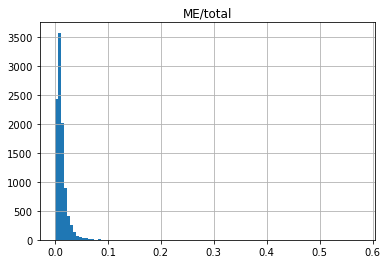

In [80]:
dfInvalid.hist('ME/total',bins=100)
plt.show()

In [85]:
dfInvalid.loc[dfInvalid['ME/total']>0.1]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,ME/total
4119,988,578,1594,7,201,1393,914.0,NaN,224.0,2126.0,...,1587.0,333,591,131,324,360,662,127,360,0.126654
944,1079,558,568,10,74,494,1132.0,1031.0,NaN,NaN,...,NaN,92,218,32,151,101,219,38,145,0.132616
1770,103,62,62,0,8,54,0.0,0.0,NaN,NaN,...,NaN,0,32,0,16,2,34,0,16,0.129032
3006,204,136,133,-3,20,113,1.0,1.0,NaN,NaN,...,NaN,14,35,0,54,15,39,0,53,0.147059
3044,250,100,100,0,15,85,0.0,0.0,NaN,NaN,...,NaN,0,8,0,71,0,8,0,67,0.150000
3194,935,387,391,4,47,344,105.0,101.0,NaN,NaN,...,NaN,76,84,9,171,89,87,19,157,0.121447
3536,29,18,18,0,4,14,0.0,0.0,NaN,NaN,...,NaN,2,9,0,3,4,8,0,3,0.222222
4146,840,402,460,58,231,229,519.0,455.0,NaN,NaN,...,NaN,31,115,0,83,27,113,0,84,0.574627
4394,78,37,37,0,4,33,NaN,NaN,NaN,NaN,...,NaN,10,8,1,11,10,9,1,14,0.108108
4479,818,608,607,-1,67,540,NaN,NaN,NaN,NaN,...,NaN,100,292,18,130,103,289,17,125,0.110197


Looking at these districts one-by-one:

*4119: 201 invalid ballots is a lot, but maybe not so much if we consider this district had several sources of ballots, including from abroad. Also, 201 < (winner)-(runner up) votes = 260 

*944: 74 invalid ballots, this is about the same as the winner-runner up. _Possible fraud? There's also 1.8% of extra ballots, while this is NOT a small district_

*1770: 8 invalid. This is a small district, and as such, invalid percentage could be large without fraud. Winner-runner up difference is twice the invalid votes.

*3006: invalid = winner-runner up, but this is a smaller district. The winner is the other party (MSZP). _Possible fraud_?

*3044: Invalid votes << winner-runner up. However, these numbers are a bit too clear-cut (100, 250, 15, everyone voted for 2 parties only)... _Should take a look at which district this is_

*3194: Invalid votes << winner-runner up.

*3536: Extremely small district, thus large deviations. Nevertheless, invalid votes could only at most make a tie.

*4146: This is the district I've found before. Further, the number of valid votes = invalid votes. _There's something really wrong in this one_

*4394: Small district. Winner votes = runner up + 1 , so they could have mattered, but unlikely that someone cheated here.

*4479: Invalid votes << winner-runner up.

*4880: Invalid votes < winner-runner up. _3% of extra ballots as well, which makes the winner-runner up quite close to extra ballots+invalid votes. This district is average size, NOT small_

*5987: Invalid votes could easily turn runner-up to winner. _Additionally, 3.5% extra ballots here, while this is an average-sized district_

*6802: invalid << winner-runner up, however: _2.5% extra ballots here, which together with the invalid votes could turn the winner around_

Cross-referencing these with the extra ballot data:

In [87]:
dfExtraBallots2.loc[dfExtraBallots2['LE/total']>0.01]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,LE/total
602,668,470,2376,36,206,2170,1190.0,NaN,892.0,2750.0,...,2340.0,158,1050,254,708,155,996,299,667,0.015385
944,1079,558,568,10,74,494,1132.0,1031.0,NaN,NaN,...,NaN,92,218,32,151,101,219,38,145,0.017921
2296,1033,609,616,7,54,562,NaN,NaN,NaN,NaN,...,NaN,105,293,27,137,117,283,47,128,0.011494
3194,935,387,391,4,47,344,105.0,101.0,NaN,NaN,...,NaN,76,84,9,171,89,87,19,157,0.010336
4146,840,402,460,58,231,229,519.0,455.0,NaN,NaN,...,NaN,31,115,0,83,27,113,0,84,0.144279
4880,943,514,531,17,92,439,1516.0,1412.0,NaN,NaN,...,NaN,66,239,17,117,68,244,19,113,0.033074
5699,669,311,320,9,10,310,4.0,4.0,NaN,NaN,...,NaN,123,119,5,53,116,125,6,56,0.028939
5987,915,489,507,18,88,419,588.0,554.0,NaN,NaN,...,NaN,95,171,6,147,99,166,6,145,0.036810
6802,776,499,512,13,76,436,233.0,221.0,NaN,NaN,...,NaN,129,212,4,91,117,237,4,80,0.026052
7667,762,498,506,8,48,458,408.0,388.0,NaN,NaN,...,NaN,98,221,12,127,103,222,17,118,0.016064


Districts with suspected fraud:

In [99]:
df.loc[[944,3006,3044,4146,4880,5987,6802]]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
944,1079,558,568,10,74,494,1132.0,1031.0,NaN,NaN,NaN,NaN,92,218,32,151,101,219,38,145
3006,204,136,133,-3,20,113,1.0,1.0,NaN,NaN,NaN,NaN,14,35,0,54,15,39,0,53
3044,250,100,100,0,15,85,0.0,0.0,NaN,NaN,NaN,NaN,0,8,0,71,0,8,0,67
4146,840,402,460,58,231,229,519.0,455.0,NaN,NaN,NaN,NaN,31,115,0,83,27,113,0,84
4880,943,514,531,17,92,439,1516.0,1412.0,NaN,NaN,NaN,NaN,66,239,17,117,68,244,19,113
5987,915,489,507,18,88,419,588.0,554.0,NaN,NaN,NaN,NaN,95,171,6,147,99,166,6,145
6802,776,499,512,13,76,436,233.0,221.0,NaN,NaN,NaN,NaN,129,212,4,91,117,237,4,80


Locations:
    
*944: Budapest, XV. district (M01/T015/szkjkv_005)

*3006: Borsod, Beret (M05/T031/szkjkv_001)

*3044: Borsod, Csenyéte (M05/T059/szkjkv_001)

*4146: Fejér, Dunaújváros (M07/T024/szkjkv_005.html)

*4880: Győr, Sopron (M08/T150/szkjkv_001)

*5987: Jász, Szolnok (M11/T052/szkjkv_020)

*6802: Pest, Cegléd (M14/T017/szkjkv_002)

Most of these are in cities, where the runner-up party (MSZP) is usually more popular. (The 2 exceptions: 3006, 3044, also there MSZP won.)

## Analysis: voter turnout

In [103]:
df
# we need to look at FE/AE, JE/EE, GE/BE

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,IE,JE,jobbik1,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2
0,1054,839,837,-2,4,833,NaN,NaN,NaN,NaN,NaN,NaN,68,395,123,244,57,409,91,247
1,1009,756,755,-1,9,746,NaN,NaN,NaN,NaN,NaN,NaN,44,349,98,252,41,351,76,259
2,1064,689,687,-2,4,683,865.0,808.0,NaN,NaN,NaN,NaN,58,354,77,187,51,350,62,190
3,990,720,719,-1,9,710,NaN,NaN,NaN,NaN,NaN,NaN,43,364,89,206,36,372,66,211
4,964,727,727,0,11,716,NaN,NaN,NaN,NaN,NaN,NaN,49,327,108,230,46,331,92,234
5,1073,813,813,0,7,806,NaN,NaN,NaN,NaN,NaN,NaN,43,389,134,237,48,386,118,238
6,943,671,669,-2,3,666,NaN,NaN,NaN,NaN,NaN,NaN,43,338,77,202,38,340,60,200
7,926,700,700,0,6,694,NaN,NaN,NaN,NaN,NaN,NaN,42,291,106,249,44,293,92,249
8,1097,811,811,0,4,807,NaN,NaN,NaN,NaN,NaN,NaN,68,403,101,230,67,404,84,234
9,1002,768,764,-4,6,758,NaN,NaN,NaN,NaN,NaN,NaN,67,329,86,273,61,339,58,288


In [104]:
df['FE/AE'] = df['FE']/df['AE']
df['JE/EE'] = df['JE']/df['EE']
df['GE/BE'] = df['GE']/df['BE']

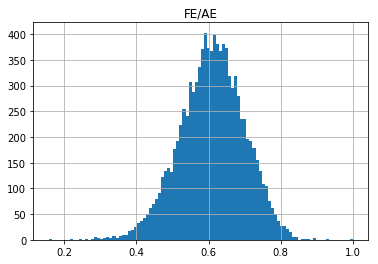

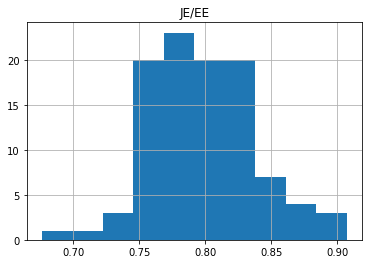

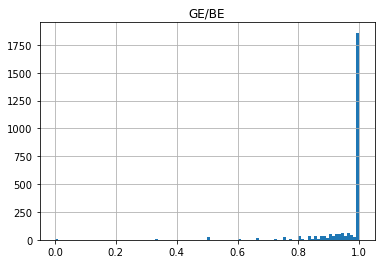

In [118]:
df.hist('FE/AE',bins=100)
df.hist('JE/EE',bins=10)
df.hist('GE/BE',bins=100)
plt.show()

*FE/AE: fairly Gaussian with a realistic mean of about 0.6

*JE/EE: there's too few of these districts to make a good statistics, but they seem OK. We can notice that the mean has shifted to 0.78, likely due to the extra people abroad who were exceptionally enthusiatic to vote.

*GE/BE: there's a huge peak at 1: almost everyone who registered to vote elsewhere (not in their own district but not abroad) went to vote. This looks a bit too much, let's check if there's a pattern in those.

In [127]:
df.loc[(df['GE/BE']>0.99)]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,FE/AE,JE/EE,GE/BE
1472,539,318,318,0,4,314,7.0,7.0,NaN,NaN,...,124,19,79,74,127,22,77,0.589981,NaN,1.0
1473,148,82,82,0,5,77,1.0,1.0,NaN,NaN,...,27,6,33,3,29,3,36,0.554054,NaN,1.0
1475,63,42,42,0,0,42,2.0,2.0,NaN,NaN,...,23,1,6,11,21,1,6,0.666667,NaN,1.0
1476,286,140,140,0,2,138,1.0,1.0,NaN,NaN,...,74,10,12,31,78,14,10,0.489510,NaN,1.0
1477,769,561,561,0,11,550,6.0,6.0,NaN,NaN,...,346,2,120,0,358,3,132,0.729519,NaN,1.0
1481,164,94,94,0,1,93,2.0,2.0,NaN,NaN,...,39,1,22,25,42,0,19,0.573171,NaN,1.0
1482,600,336,336,0,4,332,3.0,3.0,NaN,NaN,...,174,7,57,70,149,10,53,0.560000,NaN,1.0
1484,290,160,160,0,0,160,1.0,1.0,NaN,NaN,...,57,9,37,46,59,10,39,0.551724,NaN,1.0
1485,256,109,109,0,2,107,1.0,1.0,NaN,NaN,...,64,2,25,14,65,3,23,0.425781,NaN,1.0
1486,642,368,368,0,6,362,2.0,2.0,NaN,NaN,...,78,4,180,83,87,9,143,0.573209,NaN,1.0


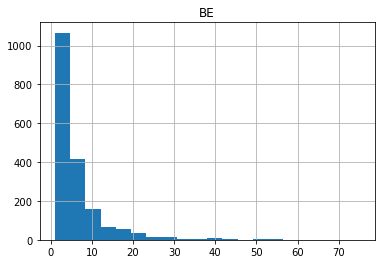

In [128]:
df.loc[(df['GE/BE']>0.99)].hist('BE',bins=20)
plt.show()

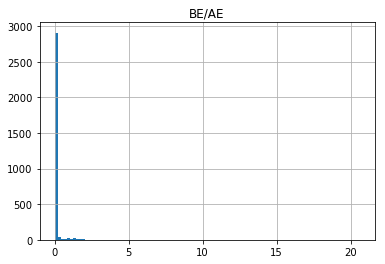

In [132]:
df['BE/AE'] = df['BE']/df['AE']
df.hist('BE/AE',bins=100)
plt.show()

In [174]:
dfTransferringVoters = df.loc[df['BE/AE']>1].copy()

In [175]:
j = 0
endOfBudapest = 1472
for i in range(110):
    if dfTransferringVoters.index[i] < endOfBudapest:
        j += 1

In [176]:
#dropping all of Budapest, it is believable that there many people registered
dfTransferringVoters.drop(dfTransferringVoters.index[0:j], inplace=True)

In [186]:
#keeping only districts where they didn't count several hundreds of extra votes from abroad
#(these are hubs, so I assume they are also hubs for other types of votes)
dfTransferringVoters.loc[dfTransferringVoters['JE'].isnull()]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,FE/AE,JE/EE,GE/BE,BE/AE
1817,1274,280,279,-1,2,277,2023.0,1775.0,NaN,NaN,...,32,86,30,117,30,88,0.219780,NaN,0.877410,1.587912
2274,801,389,389,0,2,387,1117.0,1025.0,NaN,NaN,...,18,113,56,181,19,114,0.485643,NaN,0.917637,1.394507
3390,1009,288,287,-1,1,286,1202.0,1053.0,NaN,NaN,...,13,85,66,112,13,80,0.285431,NaN,0.876040,1.191278
4400,672,240,240,0,2,238,1278.0,1180.0,NaN,NaN,...,13,75,45,101,15,74,0.357143,NaN,0.923318,1.901786
4617,618,362,361,-1,2,359,1840.0,1606.0,NaN,NaN,...,22,131,35,166,27,123,0.585761,NaN,0.872826,2.977346
4880,943,514,531,17,92,439,1516.0,1412.0,NaN,NaN,...,17,117,68,244,19,113,0.545069,NaN,0.931398,1.607635
5111,1393,751,751,0,6,745,2015.0,1811.0,NaN,NaN,...,34,245,124,321,44,230,0.539124,NaN,0.898759,1.446518
8094,437,227,227,0,1,226,474.0,448.0,NaN,NaN,...,18,55,30,115,19,55,0.519451,NaN,0.945148,1.084668
8508,726,470,470,0,3,467,899.0,810.0,NaN,NaN,...,20,153,88,180,32,150,0.647383,NaN,0.901001,1.238292
9598,568,387,386,-1,5,381,721.0,695.0,NaN,NaN,...,16,75,56,221,14,80,0.681338,NaN,0.963939,1.269366


In [185]:
dfTransferringVoters.loc[dfTransferringVoters['JE'].isnull()][['jobbik1','fidesz1','mszp1','lmp1']]

,jobbik1,fidesz1,mszp1,lmp1
1817,29,121,86,32
2274,50,194,113,18
3390,67,104,85,13
4400,44,99,75,13
4617,29,173,131,22
4880,66,239,117,17
5111,109,340,245,34
8094,26,116,55,18
8508,96,174,153,20
9598,53,221,75,16


Based on how number of votes (above) is significantly smaller than AE+BE, as well as checking original data, these are also hubs.

I could (and should) look at this more (e.g. were all the above eliminated ones (Budapest,JE) also all hubs?), but I'll move on to more interesting things for now.

Such as: districts where everyone showed up who registered (GE/BE), AND these people are a significant portion of the total voters:

In [130]:
df.loc[(df['GE/BE']>0.99) & (df['BE']/df['AE'] > 0.1)]

,AE,FE,KE,LE,ME,NE,BE,GE,C,EE,...,fidesz1,lmp1,mszp1,jobbik2,fidesz2,lmp2,mszp2,FE/AE,JE/EE,GE/BE
2652,414,287,287,0,4,283,45.0,45.0,NaN,NaN,...,134,16,49,71,128,16,49,0.693237,NaN,1.0
3645,27,18,18,0,0,18,5.0,5.0,NaN,NaN,...,10,0,4,5,8,0,4,0.666667,NaN,1.0
3754,19,16,16,0,0,16,2.0,2.0,NaN,NaN,...,6,0,7,3,5,0,7,0.842105,NaN,1.0
4283,700,399,399,0,6,393,75.0,75.0,NaN,NaN,...,210,19,43,104,210,19,38,0.570000,NaN,1.0
6511,46,41,41,0,2,39,6.0,6.0,NaN,NaN,...,17,1,3,12,23,1,4,0.891304,NaN,1.0
8003,27,19,19,0,0,19,6.0,6.0,NaN,NaN,...,12,1,3,3,12,1,3,0.703704,NaN,1.0
9226,16,9,9,0,0,9,2.0,2.0,NaN,NaN,...,6,0,0,2,7,0,0,0.562500,NaN,1.0
9572,12,12,12,0,1,11,2.0,2.0,NaN,NaN,...,6,0,3,2,6,0,3,1.000000,NaN,1.0
9584,27,19,19,0,0,19,5.0,5.0,NaN,NaN,...,4,2,7,6,4,2,6,0.703704,NaN,1.0
9585,34,25,25,0,1,24,4.0,4.0,NaN,NaN,...,15,0,6,2,16,0,6,0.735294,NaN,1.0


None of these have excessively large number of GE voters, it's quite possible that all 75 people showed up to vote.